In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
crd=pd.read_csv('C:\\Users\\adity\\OneDrive\\Documents\\Python Scripts\\Kaggle\\Netflix_Recommdation\\credits.csv')
tlt=pd.read_csv('C:\\Users\\adity\\OneDrive\\Documents\\Python Scripts\\Kaggle\\Netflix_Recommdation\\titles.csv')

In [3]:
x=""
for i in range(0,len(tlt['production_countries'])):
    x=""
    for j in range(0,len(tlt['production_countries'][i])-1):
        if tlt['production_countries'][i][j]!='[':
            if tlt['production_countries'][i][j]!="'":
                
                    x=x+tlt['production_countries'][i][j]
    tlt.loc[i,'production_countries']=x

In [4]:
x=""
for i in range(0,len(tlt['genres'])):
    x=""
    for j in range(0,len(tlt['genres'][i])-1):
        if tlt['genres'][i][j]!='[':
            if tlt['genres'][i][j]!="'":
                x=x+tlt['genres'][i][j]
    tlt.loc[i,'genres']=x

In [5]:
country=[]
g=""
tlt=tlt.replace('',"No Data")
for i in range(0,len(tlt['production_countries'])):
    g=""
    x=tlt['production_countries'][i]+','
    for j in x:
        if j==',':
            g=g.strip()
            country.append(g)
            g=""
        else:
            g=g+j

C=pd.DataFrame({'C':country})
c=C['C'].unique()
code=pd.read_csv('https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv')
xx=C.value_counts()
code['Count']=0
for i in range(0,len(code['Name'])):
    xyz=code['Code'][i]
    if len(C.query("C==@xyz"))>0:
        code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]
    xyz=code['Name'][i]
    if len(C.query("C==@xyz"))>0:
        code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]

        
code['Count']=code['Count'].replace(0,np.nan)
code=code.dropna()
code = code.sort_values(by='Count',ascending=False)
code=code.reset_index(drop=True)
tten=code.head(10)[['Name','Count']]

<ipython-input-5-49efe37cca54>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]
<ipython-input-5-49efe37cca54>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]


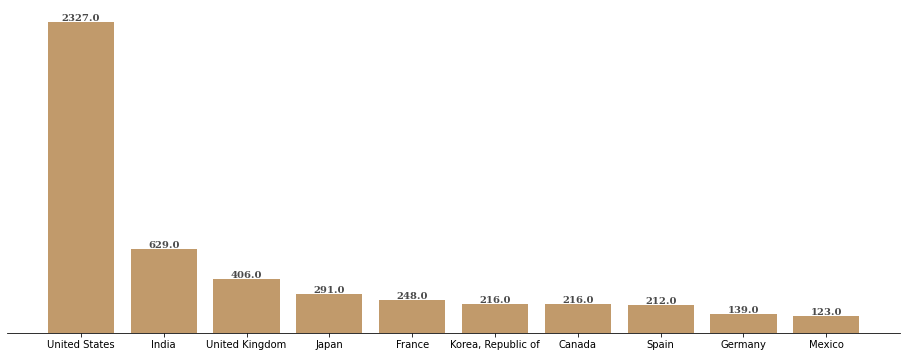

In [6]:
fig,ax= plt.subplots(1,1,figsize=(16,6))
ax.bar(tten['Name'],tten['Count'],color='#C19A6B')
for i in range(0,len(tten)):
    ax.annotate(f"{tten['Count'][i]}",
                   xy=(tten['Name'][i], tten['Count'][i] + 30),
                   va = 'center', ha='center',fontweight='bold', fontfamily='serif',
                   color='#4a4a4a')
for i in ['top','right','left']:
    ax.spines[i].set_visible(False)
ax.set_yticks([])
#ax.annotate(0.5,0.5,"US produces most of the content")
plt.show()

<ipython-input-7-ea81d91d68f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['percent'][i]=((code['Count'][i]/code['Count'].sum())*100).astype(float)


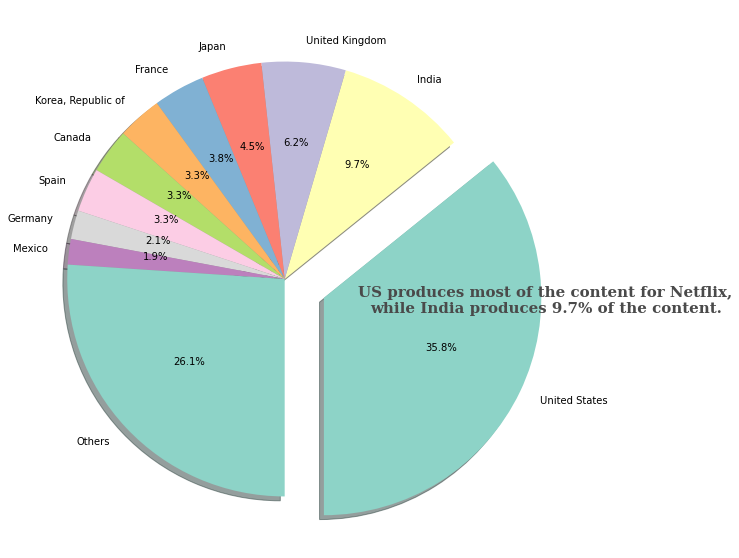

In [7]:
code['percent']=0
for i in range(0,len(code['Count'])):
    code['percent'][i]=((code['Count'][i]/code['Count'].sum())*100).astype(float)
cc=[]
co=[]
ce=[]
per=[]
s=0
for i in range(0,len(code['Count'])):
    if i<10:
        cc.append(code['Name'][i])
        co.append(code['Count'][i])
        ce.append(code['Code'][i])
    else:
        s=s+code['Count'][i]
cc.append('Others')
ce.append('OTHER')
co.append(s)
fig, ax =plt.subplots(1,1,figsize=(16,10))
ax.axis('off')
explode=[0.2]
for i in range(0,len(co)-1):
     explode.append(0.0)

def func(pct, allvals):
    return "{:.1f}%\n".format(pct, allvals)
color=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']
ax.pie(co,labels=cc,explode=explode,startangle = -90,
       colors=color[:len(co)],
       shadow=True,autopct=lambda pct: func(pct, co ), textprops=dict(color="black"))
ax.annotate(
'''US produces most of the content for Netflix,
while India produces 9.7% of the content.''',
           xy=(1.2,-0.1),va='center',ha='center',
fontsize=15,fontweight='bold',color='#4a4a4a',fontfamily='serif')
plt.show()

In [8]:
tten=pd.DataFrame({'Name':cc,'Overall':co,'Code':ce})
df_m=tlt.query('type=="MOVIE"').reset_index(drop=True)
df_m['production_countries'] = df_m['production_countries'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
Types = []
for i in df_m['production_countries']: Types += i
Types = set(Types)

co=[]
g=0
for i in Types:
    g=0
    for j in range(0,len(df_m['production_countries'])):
        x=df_m['production_countries'][j]

        for k in x:
            if i==k:
                g=g+1
    co.append(g)

def percent(co):
    x=sum(co)
    per=[]
    for i in co:
        per.append((i/x)*100)
    return per
per=percent(co)
gen=pd.DataFrame({'Code':list(Types),'Count':co,'Percent':per})
tten['Movie']=0
tten['Show']=0
tten['MP']=0
tten['SP']=0
tten['percent']=0

xyy=sum(tten['Overall'])
for i in range(0,len(tten['Name'])-1):
    xxy=tten['Code'][i]

    tten.loc[i,'Movie']=gen.query('Code==@xxy')['Count'].values
    tten.loc[i,'Show']=tten['Overall'][i]-tten['Movie'][i]
    tten.loc[i,'MP']= round((tten['Movie'][i] / tten['Overall'][i])*100,2)
    tten.loc[i,'SP']=round(100-tten['MP'][i],2)
    tten.loc[i,'percent']=round((tten['Overall'][i]/xyy)*100,2)
    
tten.loc[10,'Movie']=sum(gen['Count'])-sum(tten['Movie'])
tten.loc[10,'Show']=tten['Overall'][10]-tten['Movie'][10]
tten.loc[10,'MP']= round((tten['Movie'][10] / tten['Overall'][10])*100,2)
tten.loc[10,'SP']=100-tten['MP'][10]

tten.loc[10,'percent']=round((tten['Overall'][10]/xyy)*100,2)

tten2 = tten.iloc[::-1]
tten2=tten2.reset_index(drop=True)

Text(0.3, 0.89, 'TV Show')

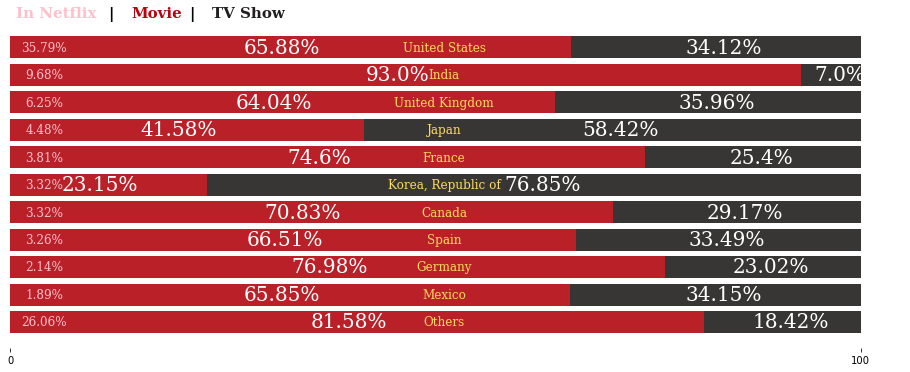

In [9]:

fig,ax=plt.subplots(1,1,figsize=(16,6))

for i in tten2.index:
    ax.barh(i, tten2['MP'][i], 
            color='#b20710', alpha=0.9, label='Male')
    ax.barh(i, tten2['SP'][i], left=tten2['MP'][i], 
            color='#221f1f', alpha=0.9, label='Female')


ax.set_xticks([0,100])
ax.set_yticks([])

for i in ['top','bottom','right','left']:
    ax.spines[i].set_visible(False)
for i in tten2.index:
    ax.annotate(f"{(tten2['MP'][i])}%", 
                   xy=(tten2['MP'][i]/2-1, i),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')

    
for i in tten2.index:
    ax.annotate(f"{(tten2['SP'][i])}%", 
                   xy=(tten2['MP'][i]+tten2['SP'][i]/2+1, i),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')
for i in tten2.index:
    ax.annotate(f"{(tten2['Name'][i])}", 
                   xy=((tten2['MP'][i]+tten2['SP'][i])/2+1, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='#FADA5E')
    
for i in tten2.index:
    ax.annotate(f"{(tten2['percent'][i])}%", 
                   xy=(4, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='pink')
    
fig.text(0.13,0.89,"In Netflix", fontweight="bold", fontfamily='serif', fontsize=15, color='pink')
fig.text(0.21,0.89,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.23,0.89,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.28,0.89,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.3,0.89,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

In [10]:
df_m=tlt.query('type=="MOVIE"').reset_index(drop=True)
df_s=tlt.query('type=="SHOW"').reset_index(drop=True)

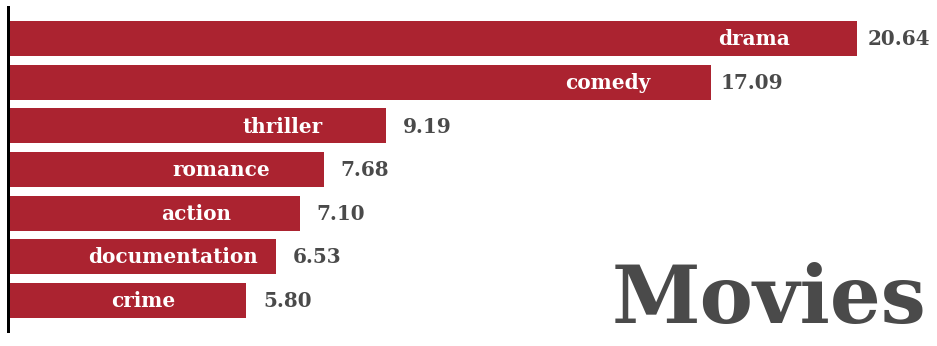

In [11]:
df_m['genre'] = df_m['genres'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
Types = []
for i in df_m['genre']: Types += i
Types = set(Types)

co=[]
g=0
for i in Types:
    g=0
    for j in range(0,len(df_m['genres'])):
        x=df_m['genres'][j]
        x=x.replace(' ,',',').replace(', ',',').split(',')
        for k in x:
            if i==k:
                g=g+1
    co.append(g)

def percent(co):
    x=sum(co)
    per=[]
    for i in co:
        per.append((i/x)*100)
    return per
per=percent(co)
gen=pd.DataFrame({'genres':list(Types),'Count':co,'Percent':per})
gen=gen.nlargest(7,['Percent']).sort_values(by=['Percent'],ascending=True)


fig, ax=plt.subplots(1,1,figsize=(16,6))

ax.barh(gen['genres'],gen['Percent'],color='#ab2330')

for i in ['top','bottom','left','right']:
    ax.spines[i].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
for i in gen.index:
    gen.loc[i,'Percent_2']="{:.2f}".format(gen['Percent'][i])
    
for i in gen.index:
    ax.annotate(f"{gen['Percent_2'][i]}",
                xy=(gen['Percent'][i]+1,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#4a4a4a'
               )
for i in gen.index:
    ax.annotate(gen['genres'][i],
                xy=(gen['Percent'][i]-2.5,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#ffffff'
               )
ax.axvline(x=0,lw =5, color='black')
fig.text(0.65,0.15,"Movies",fontweight='bold', fontfamily='serif',fontsize=80,
                color='#4a4a4a')
plt.show()

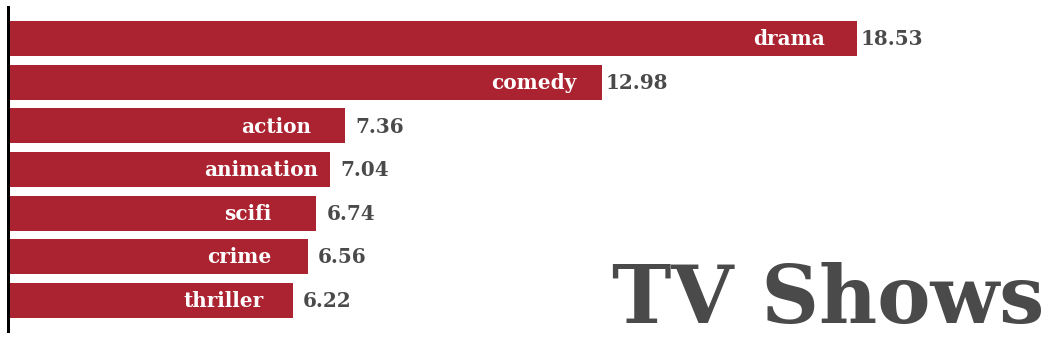

In [12]:
df_s['genre'] = df_s['genres'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
Types = []
for i in df_s['genre']: Types += i
Types = set(Types)

co=[]
g=0
for i in Types:
    g=0
    for j in range(0,len(df_s['genres'])):
        x=df_s['genres'][j]
        x=x.replace(' ,',',').replace(', ',',').split(',')
        for k in x:
            if i==k:
                g=g+1
    co.append(g)

def percent(co):
    x=sum(co)
    per=[]
    for i in co:
        per.append((i/x)*100)
    return per
per=percent(co)
gen=pd.DataFrame({'genres':list(Types),'Count':co,'Percent':per})
gen=gen.nlargest(7,['Percent']).sort_values(by=['Percent'],ascending=True)

fig, ax=plt.subplots(1,1,figsize=(16,6))

ax.barh(gen['genres'],gen['Percent'],color='#ab2330')

for i in ['top','bottom','left','right']:
    ax.spines[i].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
for i in gen.index:
    gen.loc[i,'Percent_2']="{:.2f}".format(gen['Percent'][i])
    
for i in gen.index:
    ax.annotate(f"{gen['Percent_2'][i]}",
                xy=(gen['Percent'][i]+0.75,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#4a4a4a'
               )
for i in gen.index:
    ax.annotate(gen['genres'][i],
                xy=(gen['Percent'][i]-1.5,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#ffffff'
               )
ax.axvline(x=0,lw =5, color='black')
fig.text(0.65,0.15,"TV Shows",fontweight='bold', fontfamily='serif',fontsize=80,
                color='#4a4a4a')
plt.show()

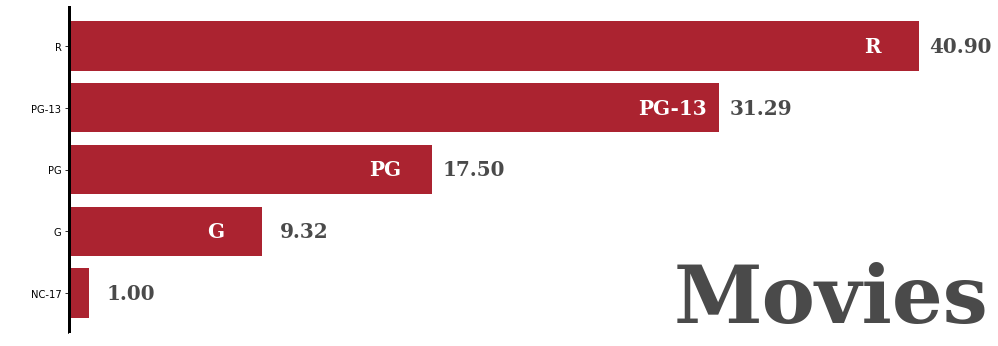

In [13]:
df_m=tlt.query('type=="MOVIE"').reset_index(drop=True)
df_m = df_m.drop(df_m[df_m['age_certification'].isna()==True].index).reset_index(drop=True)
df_m['age_certification'] = df_m['age_certification'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
Types = []
for i in df_m['age_certification']: Types += i
Types = set(Types)

co=[]
g=0
for i in Types:
    g=0
    for j in range(0,len(df_m['age_certification'])):
        x=df_m['age_certification'][j]

        for k in x:
            if i==k:
                g=g+1
    co.append(g)

def percent(co):
    x=sum(co)
    per=[]
    for i in co:
        per.append((i/x)*100)
    return per
per=percent(co)
gen=pd.DataFrame({'genres':list(Types),'Count':co,'Percent':per})
gen=gen.nlargest(7,['Percent']).sort_values(by=['Percent'],ascending=True)

fig, ax=plt.subplots(1,1,figsize=(16,6))

ax.barh(gen['genres'],gen['Percent'],color='#ab2330')

for i in ['top','bottom','right']:
    ax.spines[i].set_visible(False)

ax.set_yticks(gen['genres'].values)
ax.set_xticks([])
for i in gen.index:
    gen.loc[i,'Percent_2']="{:.2f}".format(gen['Percent'][i])
    
for i in gen.index:
    ax.annotate(f"{gen['Percent_2'][i]}",
                xy=(gen['Percent'][i]+2,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#4a4a4a'
               )
for i in gen.index:
    ax.annotate(gen['genres'][i],
                xy=(gen['Percent'][i]-2.25,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#ffffff'
               )
ax.axvline(x=0,lw =5, color='black')
fig.text(0.65,0.15,"Movies",fontweight='bold', fontfamily='serif',fontsize=80,
                color='#4a4a4a')
plt.show()

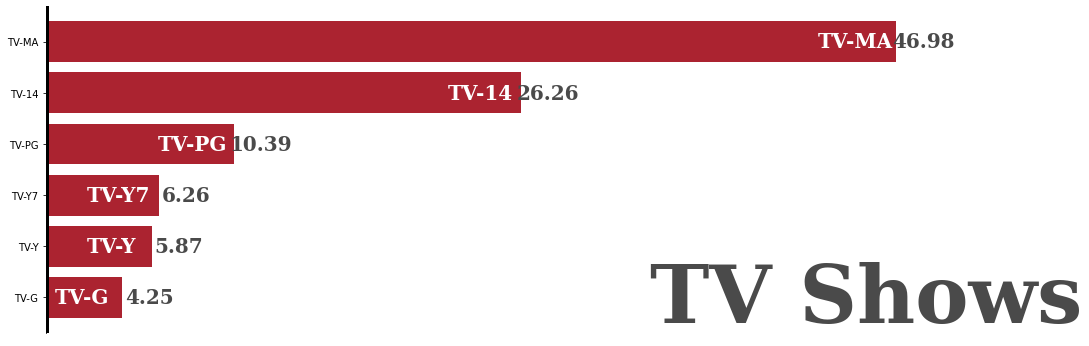

In [14]:
df_s=tlt.query('type=="SHOW"').reset_index(drop=True)
df_s = df_s.drop(df_s[df_s['age_certification'].isna()==True].index).reset_index(drop=True)
df_s['age_certification'] = df_s['age_certification'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
Types = []
for i in df_s['age_certification']: Types += i
Types = set(Types)

co=[]
g=0
for i in Types:
    g=0
    for j in range(0,len(df_s['age_certification'])):
        x=df_s['age_certification'][j]

        for k in x:
            if i==k:
                g=g+1
    co.append(g)

def percent(co):
    x=sum(co)
    per=[]
    for i in co:
        per.append((i/x)*100)
    return per
per=percent(co)
gen=pd.DataFrame({'genres':list(Types),'Count':co,'Percent':per})
gen=gen.nlargest(7,['Percent']).sort_values(by=['Percent'],ascending=True)

fig, ax=plt.subplots(1,1,figsize=(16,6))

ax.barh(gen['genres'],gen['Percent'],color='#ab2330')

for i in ['top','bottom','right']:
    ax.spines[i].set_visible(False)

ax.set_yticks(gen['genres'])
ax.set_xticks([])
for i in gen.index:
    gen.loc[i,'Percent_2']="{:.2f}".format(gen['Percent'][i])
    
for i in gen.index:
    ax.annotate(f"{gen['Percent_2'][i]}",
                xy=(gen['Percent'][i]+1.5,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#4a4a4a'
               )
for i in gen.index:
    ax.annotate(gen['genres'][i],
                xy=(gen['Percent'][i]-2.25,gen['genres'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#ffffff'
               )
ax.axvline(x=0,lw =5, color='black')
fig.text(0.65,0.15,"TV Shows",fontweight='bold', fontfamily='serif',fontsize=80,
                color='#4a4a4a')
plt.show()

<ipython-input-15-8c5bfa5718c3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]
<ipython-input-15-8c5bfa5718c3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]


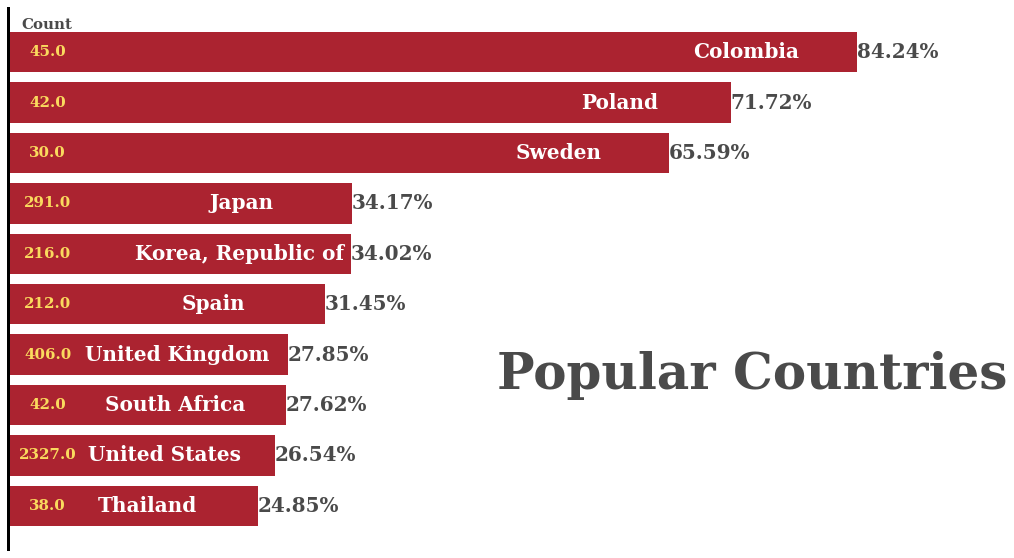

In [15]:
cu=[]
pop=[]
for i in range(0,len(tlt['production_countries'])):
    y=tlt['production_countries'][i]
    x=(y.replace('[','').replace(']','').replace("'",'').replace(' ','').split(','))
    for j in x:
        cu.append(j)
        pop.append(tlt['tmdb_popularity'][i])
df=pd.DataFrame({'Name':cu,'Pop':pop})
df=df.groupby(['Name'])['Pop'].mean()
df=pd.DataFrame({'Name':df.index,'pop':df.values})
df['Name']=df['Name'].replace('',np.nan)
df=df.dropna().reset_index(drop=True)

C=pd.DataFrame({'C':cu})
code=pd.read_csv('https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv')
xx=C.value_counts()
code['Count']=0
code['pop']=0
for i in range(0,len(code['Name'])):
    xyz=code['Code'][i]
    if len(C.query("C==@xyz"))>0:
        code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]
    xyz=code['Name'][i]
    if len(C.query("C==@xyz"))>0:
        code['Count'][i]=code['Count'][i]+xx[code['Code'][i]]
        
    
        
code['Count']=code['Count'].replace(0,np.nan)
code=code.dropna()
code = code.sort_values(by='Count',ascending=False)
code=code.reset_index(drop=True)

for i in range(0,len(code['Name'])):
    xx=code['Code'][i]
    xy=df.query('Name==@xx')['pop']
    code.loc[i,'pop']=round(float(xy.values),2)
code=code.query('Count>29')
code=code.nlargest(10,'pop').reset_index(drop=True).sort_values(by='pop',ascending=True)


fig, ax=plt.subplots(1,1,figsize=(16,10))

ax.barh(code['Name'],code['pop'],color='#ab2330')

for i in ['top','bottom','left','right']:
    ax.spines[i].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.axvline(x=0,lw =5, color='black')

for i in code.index:
    ax.annotate(f"{code['pop'][i]}%",
                xy=(code['pop'][i]+4,code['Name'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#4a4a4a'
               )
for i in code.index:
    ax.annotate(code['Name'][i],
                xy=(code['pop'][i]-11,code['Name'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=20,
                color='#ffffff'
               )
for i in code.index:
    ax.annotate(f"{code['Count'][i]}",
                xy=(4,code['Name'][i]),
                va = 'center', ha='center',fontweight='bold', fontfamily='serif',fontsize=15,
                color='#FADA5E'
               )

fig.text(0.137,0.85,"Count",fontweight='bold', fontfamily='serif',fontsize=15,color='#4a4a4a')
fig.text(0.55,0.35,"Popular Countries",fontweight='bold', fontfamily='serif',fontsize=50,color='#4a4a4a')
plt.show()

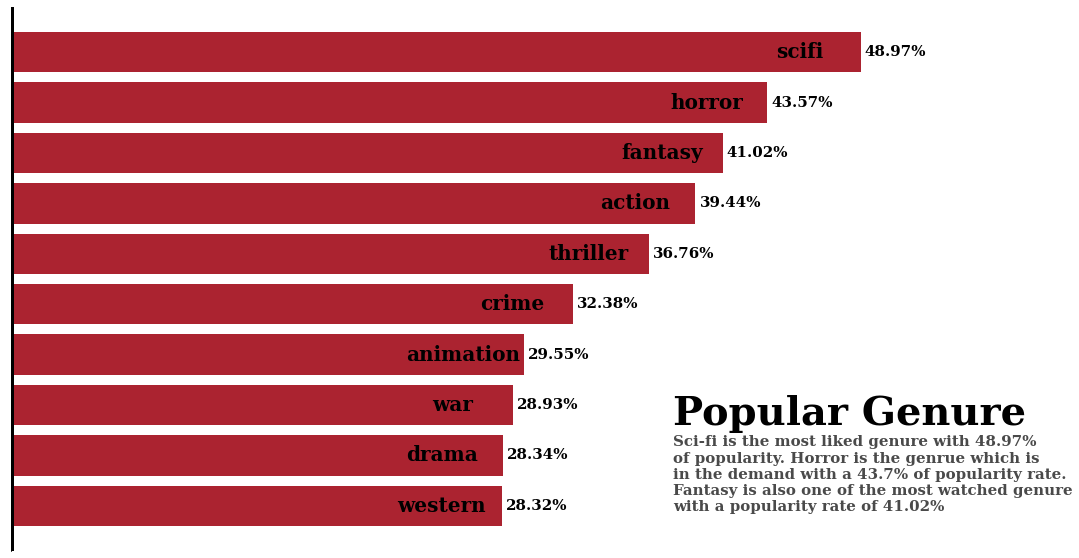

In [16]:
x=tlt['genres'].apply(lambda y : y.replace(' ,',',').replace(', ',',').split(','))
y=[]
z=[]
ty=[]
for i in range(0,len(x)):
    for j in range(0,len(x[i])):
        y.append(x[i][j])
        z.append(tlt['tmdb_popularity'][i])
        ty.append(tlt['type'][i])

df_g=pd.DataFrame({'Name':y,'Pop':z,'type':ty})
x=df_g.groupby(['Name'])['Pop'].sum()
y=df_g.groupby(['Name'])['Pop'].count()
z=x.values/y.values
df_g=pd.DataFrame({'Name':x.index,'Pop':z})
df_g=df_g.nlargest(10,'Pop').reset_index(drop=True).sort_values(by='Pop',ascending=True)

fig, ax = plt.subplots(1,1,figsize=(16,10))

ax.barh(df_g.Name,df_g.Pop,color='#ab2330')

for i in ['top','bottom','right']:
    ax.spines[i].set_visible(False)
ax.axvline(x=0,lw =5, color='black')

ax.set_xticks([])
ax.set_yticks([])

for i in range(0,len(df_g['Name'])):
    ax.annotate(f"{df_g['Name'][i]}",
               xy=(df_g['Pop'][i]-3.5,df_g['Name'][i]),
               va='center', ha='center',fontweight='bold',fontsize=20, fontfamily='serif',
               color='black')
    
df_g['Pop']=round(df_g['Pop'],2)
for i in range(0,len(df_g['Name'])):
    ax.annotate(f"{df_g['Pop'][i]}%",
               xy=(df_g['Pop'][i]+2,df_g['Name'][i]),
               va='center', ha='center',fontweight='bold',fontsize=15, fontfamily='serif',
               color='black')

fig.text(0.7,0.3,"Popular Genure",fontweight='bold', fontfamily='serif',fontsize=40,
                color='black')
fig.text(0.70,0.18,
'''Sci-fi is the most liked genure with 48.97% 
of popularity. Horror is the genrue which is
in the demand with a 43.7% of popularity rate.
Fantasy is also one of the most watched genure
with a popularity rate of 41.02%'''
         ,fontweight='bold', fontfamily='serif',fontsize=15,
                color='#4a4a4a')

#4a4a4a
    
plt.show()

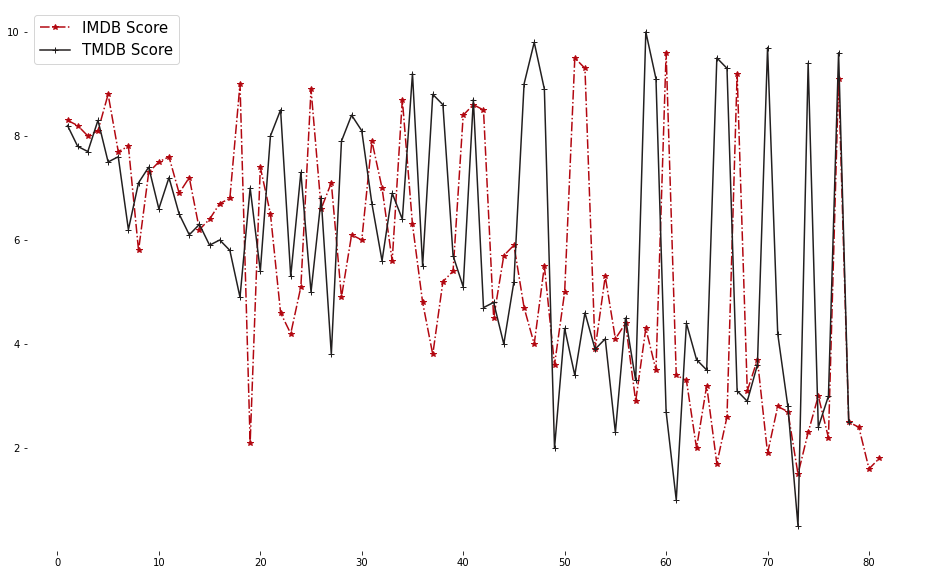

In [17]:
fig, ax = plt.subplots(1,1,figsize=(16,10))

ax.plot(tlt['imdb_score'].unique(),ls ='-.',label='IMDB Score',marker='*',color='#b20710')
ax.plot(tlt['tmdb_score'].unique(),marker='+',label='TMDB Score',color='#221f1f')

for i in ['top','bottom','right','left']:
    ax.spines[i].set_visible(False)
ax.legend(loc='upper left',prop={'size':15})
plt.show()

# How each Genrue is related to another

<ipython-input-18-a4d91f1053e3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genres'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))


There are 20 types in the Netflix SHOW Dataset


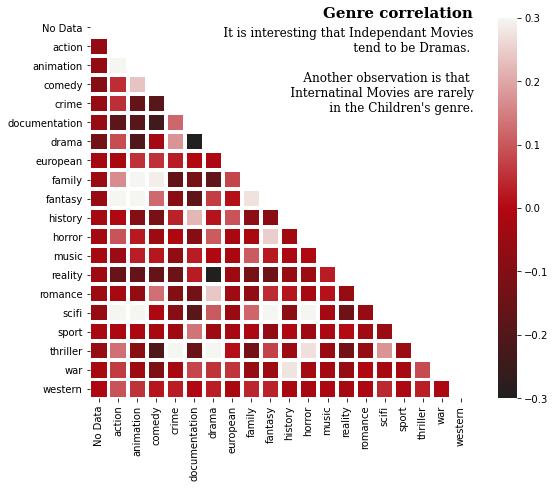

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['genres'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    # This line can be changed according to the problem statement
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    # .....................
    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
df_tv = tlt[tlt["type"] == "SHOW"]
df_movies = tlt[tlt["type"] == "MOVIE"]

genre_heatmap(df_tv, 'SHOW')
plt.show()

No handles with labels found to put in legend.


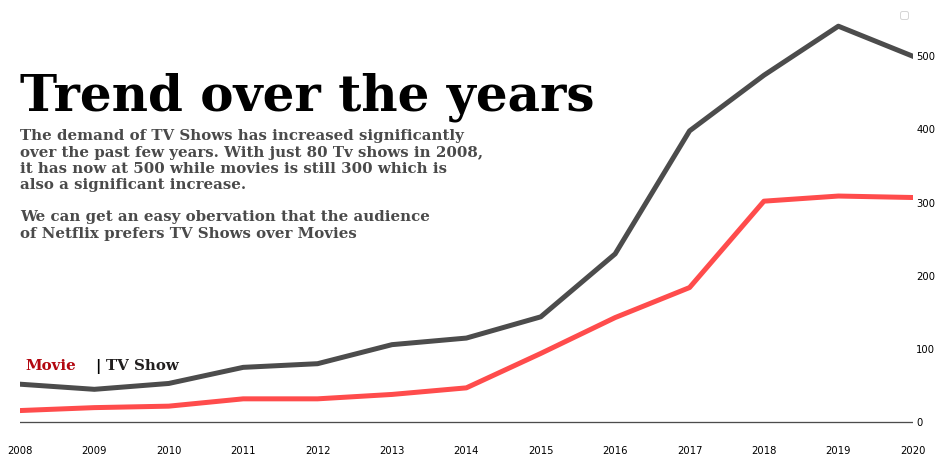

In [19]:
tlt_m=tlt.query('type=="MOVIE"')
tlt_s=tlt.query('type=="SHOW"')
x=tlt_s.groupby(['release_year'])['release_year'].count()
y=tlt_m.groupby(['release_year'])['release_year'].count()

k=[]
xx=[]
yy=[]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])
for i in range(min(min(x.index),min(y.index)),max(max(x.index),max(y.index))):
    k.append(i)
    try:
        xx.append(x[i])
    except:
        xx.append(0)
    
    try:
        yy.append(y[i])
    except:
        yy.append(0)
da=pd.DataFrame({'Years':k,'Movies':yy,'Shows':xx})

fig, ax=plt.subplots(figsize=(16,8))

ax.plot(da.Years, da.Movies, color="black",alpha=0.7,lw=5)
ax.plot(da.Years, da.Shows, color="red",alpha=0.7,lw=5)

ax.yaxis.tick_right()
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13,0.25,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.25,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.25,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
fig.text(0.125,0.7,"Trend over the years",fontweight="bold",fontfamily='serif',fontsize=50,color='black')
fig.text(0.125,0.48,
'''The demand of TV Shows has increased significantly
over the past few years. With just 80 Tv shows in 2008,
it has now at 500 while movies is still 300 which is 
also a significant increase.

We can get an easy obervation that the audience
of Netflix prefers TV Shows over Movies'''
         ,fontweight="bold",fontfamily='serif',fontsize=15,color='#4a4a4a')
ax.tick_params(axis=u'both', which=u'both',length=0)


#4a4a4a
ax.legend();

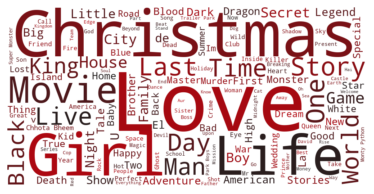

In [20]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(tlt['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')


#mask = np.array(Image.open('../input/netflix-icon-new/f6974e017d3f6196c4cbe284ee3eaf4e.png'))

wordcloud = WordCloud(background_color = 'white', width = 1000,  height = 500,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose  import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
tlt2=tlt.dropna()
x=tlt2[['imdb_score']]
y=tlt2[['tmdb_score']]
k=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans')
trf=ColumnTransformer([
    ('mean',k,[0])
])


tlt2['imdb_score_encode']=trf.fit_transform(x)
tlt2['tmdb_score_encode']=trf.fit_transform(y)
print(tlt2['imdb_score_encode'],tlt2['tmdb_score_encode'])

5       9.0
29      8.0
47      9.0
55      6.0
57      5.0
       ... 
5758    6.0
5768    4.0
5770    7.0
5785    3.0
5796    3.0
Name: imdb_score_encode, Length: 1597, dtype: float64 5       8.0
29      6.0
47      8.0
55      7.0
57      5.0
       ... 
5758    8.0
5768    6.0
5770    3.0
5785    4.0
5796    5.0
Name: tmdb_score_encode, Length: 1597, dtype: float64


<ipython-input-21-3bcd7501cfe7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlt2['imdb_score_encode']=trf.fit_transform(x)
<ipython-input-21-3bcd7501cfe7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlt2['tmdb_score_encode']=trf.fit_transform(y)


C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


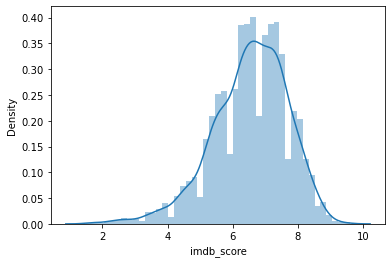

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


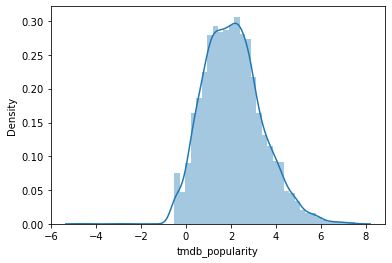

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tmdb_popularity', ylabel='Density'>

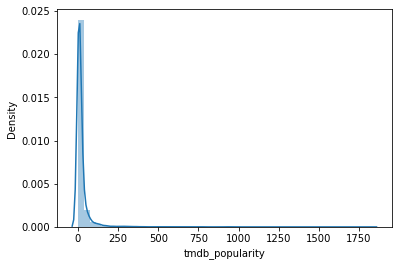

In [22]:
xx=np.log(tlt['tmdb_popularity'])
yy=tlt['imdb_score']
sns.distplot(yy)
plt.show()
sns.distplot(xx)
plt.show()
sns.distplot(tlt['tmdb_popularity'])

In [26]:
tlt.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [46]:
x=tlt['imdb_score']
su=[]
for i in x[1:3]:
    s=0
    g=0
    print()
    dd=tlt.query('imdb_score==@i')
    print(len(dd))
    for j in dd['tmdb_popularity']:
        s=s+j
        print(s)
        g=g+1
    if g==0:
        g=1
    #print(s)
    su.append(s)
su


52
27.612
48.934
85.43599999999999
120.125
128.422
150.66
178.114
183.977
196.90800000000002
197.55300000000003
230.329
235.883
252.969
304.793
444.78700000000003
450.374
456.12100000000004
463.08900000000006
466.75000000000006
482.1480000000001
517.0820000000001
543.6640000000001
565.9060000000001
587.6400000000001
598.9940000000001
614.2190000000002
635.4620000000002
640.9420000000002
641.5630000000002
642.9630000000002
740.6630000000002
781.4630000000002
788.3040000000002
803.7530000000002
808.4090000000001
817.1470000000002
829.0110000000002
834.4890000000001
1144.2440000000001
1207.823
1228.4270000000001
1256.8860000000002
1284.8410000000001
1298.9140000000002
1317.188
nan
nan
nan
nan
nan
nan
nan

67
18.215999999999998
69.341
70.515
843.705
859.664
933.756
974.323
1002.0509999999999
1007.2349999999999
1014.4849999999999
1015.1109999999999
1020.3149999999998
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


[nan, nan]